In [1]:
import numpy as np
import newbridge as nb
import parameters as prm
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# load data
import pickle
with open('nem_3D_duffing_trueDrift.pkl','rb') as f:
    xout, tout, x_without_noise, euler_param, sim_param = pickle.load(f)

In [3]:
print(xout.shape)

(13, 101, 3)


In [4]:
print(tout.shape)

(13, 101)


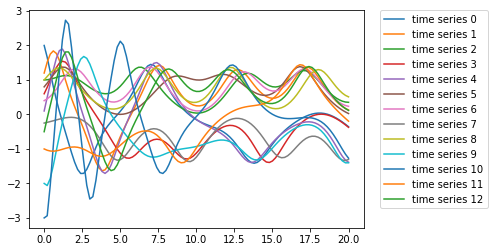

In [5]:
p0, = plt.plot(tout[0, :], xout[0, :, 0], label='time series 0')
p1, = plt.plot(tout[0, :], xout[1, :, 0], label='time series 1')
p2, = plt.plot(tout[0, :], xout[2, :, 0], label='time series 2')
p3, = plt.plot(tout[0, :], xout[3, :, 0], label='time series 3')
p4, = plt.plot(tout[0, :], xout[4, :, 0], label='time series 4')
p5, = plt.plot(tout[0, :], xout[5, :, 0], label='time series 5')
p6, = plt.plot(tout[0, :], xout[6, :, 0], label='time series 6')
p7, = plt.plot(tout[0, :], xout[7, :, 0], label='time series 7')
p8, = plt.plot(tout[0, :], xout[8, :, 0], label='time series 8')
p9, = plt.plot(tout[0, :], xout[9, :, 0], label='time series 9')
p10, = plt.plot(tout[0, :], xout[10, :, 0], label='time series 10')
p11, = plt.plot(tout[0, :], xout[11, :, 0], label='time series 11')
p12, = plt.plot(tout[0, :], xout[12, :, 0], label='time series 12')
plt.legend(handles = [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

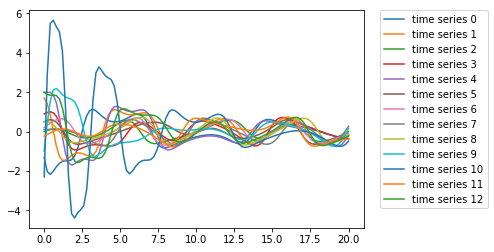

In [6]:
p0, = plt.plot(tout[0, :], xout[0, :, 1], label='time series 0')
p1, = plt.plot(tout[0, :], xout[1, :, 1], label='time series 1')
p2, = plt.plot(tout[0, :], xout[2, :, 1], label='time series 2')
p3, = plt.plot(tout[0, :], xout[3, :, 1], label='time series 3')
p4, = plt.plot(tout[0, :], xout[4, :, 1], label='time series 4')
p5, = plt.plot(tout[0, :], xout[5, :, 1], label='time series 5')
p6, = plt.plot(tout[0, :], xout[6, :, 1], label='time series 6')
p7, = plt.plot(tout[0, :], xout[7, :, 1], label='time series 7')
p8, = plt.plot(tout[0, :], xout[8, :, 1], label='time series 8')
p9, = plt.plot(tout[0, :], xout[9, :, 1], label='time series 9')
p10, = plt.plot(tout[0, :], xout[10, :, 1], label='time series 10')
p11, = plt.plot(tout[0, :], xout[11, :, 1], label='time series 11')
p12, = plt.plot(tout[0, :], xout[12, :, 1], label='time series 12')
plt.legend(handles = [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

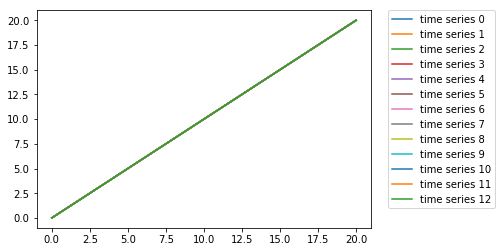

In [7]:
p0, = plt.plot(tout[0, :], xout[0, :, 2], label='time series 0')
p1, = plt.plot(tout[0, :], xout[1, :, 2], label='time series 1')
p2, = plt.plot(tout[0, :], xout[2, :, 2], label='time series 2')
p3, = plt.plot(tout[0, :], xout[3, :, 2], label='time series 3')
p4, = plt.plot(tout[0, :], xout[4, :, 2], label='time series 4')
p5, = plt.plot(tout[0, :], xout[5, :, 2], label='time series 5')
p6, = plt.plot(tout[0, :], xout[6, :, 2], label='time series 6')
p7, = plt.plot(tout[0, :], xout[7, :, 2], label='time series 7')
p8, = plt.plot(tout[0, :], xout[8, :, 2], label='time series 8')
p9, = plt.plot(tout[0, :], xout[9, :, 2], label='time series 9')
p10, = plt.plot(tout[0, :], xout[10, :, 2], label='time series 10')
p11, = plt.plot(tout[0, :], xout[11, :, 2], label='time series 11')
p12, = plt.plot(tout[0, :], xout[11, :, 2], label='time series 12')
plt.legend(handles = [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12], bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)

In [8]:
def H(degree, x):
    switcher = {
        0: 0.63161877774606470129,
        1: 0.63161877774606470129 * x,
        2: 0.44662192086900116570 * (np.power(x, 2) - 1),
        3: 0.25785728623970555997 * (np.power(x, 3) - 3 * x),
        4: 0.12892864311985277998 * (np.power(x, 4) - 6 * np.power(x, 2) + 3),
    }
    return switcher.get(degree, "Polynomial degree exceeded")

def hermite_basis(x):
    y = np.zeros((x.shape[0], prm.dof))
    index = 0
    print(x.shape)
    print(y.shape)
    print(prm.dof)
    
    for d in range(0, prm.polynomial_degree):
        for i in range(0, d + 1):
            for j in range(0, d + 1):
                for k in range(0, d + 1):
                    if (i + j + k == d):
                        print("d", d, "i", i, "j", j, "k", k, "index", index)
                        y[:, index] = H(i, x[:, 0]) * H(j, x[:, 1]) * H(k, x[:, 2])
                        index += 1

    return y

In [9]:
x = np.array([[1., 2., 3.], [1., 3., 5.]])
H = hermite_basis(x)
print(H)

(2, 3)
(2, 20)
20
d 0 i 0 j 0 k 0 index 0
d 1 i 0 j 0 k 1 index 1
d 1 i 0 j 1 k 0 index 2
d 1 i 1 j 0 k 0 index 3
d 2 i 0 j 0 k 2 index 4
d 2 i 0 j 1 k 1 index 5
d 2 i 0 j 2 k 0 index 6
d 2 i 1 j 0 k 1 index 7
d 2 i 1 j 1 k 0 index 8
d 2 i 2 j 0 k 0 index 9
d 3 i 0 j 0 k 3 index 10
d 3 i 0 j 1 k 2 index 11
d 3 i 0 j 2 k 1 index 12
d 3 i 0 j 3 k 0 index 13
d 3 i 1 j 0 k 2 index 14
d 3 i 1 j 1 k 1 index 15
d 3 i 1 j 2 k 0 index 16
d 3 i 2 j 0 k 1 index 17
d 3 i 2 j 1 k 0 index 18
d 3 i 3 j 0 k 0 index 19
[[  0.25197944   0.75593831   0.50395887   0.25197944   1.42541094
    1.51187661   0.5345291    0.75593831   0.50395887   0.           1.85166313
    2.85082188   1.60358731   0.20574035   1.42541094   1.51187661
    0.5345291    0.           0.          -0.20574035]
 [  0.25197944   1.25989718   0.75593831   0.25197944   4.27623282
    3.77969153   1.42541094   1.25989718   0.75593831   0.          11.31571912
   12.82869847   7.1270547    1.85166313   4.27623282   3.77969153
    1.425